In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)


## Load data

In [2]:
# Load dataset
df = pd.read_csv('placement.csv')

# Drop unwanted index column if present
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Basic checks
print('Shape:', df.shape)
display(df.head())
display(df.sample(5, random_state=42))
display(df.info())
display(df.describe(include='all'))
print('\nMissing values per column:')
print(df.isna().sum())

Shape: (100, 3)


,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


,cgpa,iq,placement
83,7.5,130.0,1
53,8.3,168.0,1
70,6.3,127.0,1
45,6.0,66.0,1
44,7.5,61.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


None

,cgpa,iq,placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000



Missing values per column:
cgpa         0
iq           0
placement    0
dtype: int64


## Column sanity & dtypes

In [3]:
# Ensure expected columns exist
expected_cols = {'cgpa', 'iq', 'placement'}
missing = expected_cols - set(df.columns)
if missing:
    raise ValueError(f'Missing expected columns: {missing}. Found: {list(df.columns)}')

# Ensure numeric dtypes where appropriate
for col in ['cgpa', 'iq']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df['placement'] = pd.to_numeric(df['placement'], errors='coerce').astype('Int64')
print(df.dtypes)

cgpa         float64
iq           float64
placement      Int64
dtype: object


## Univariate distributions (no deprecated `distplot`)

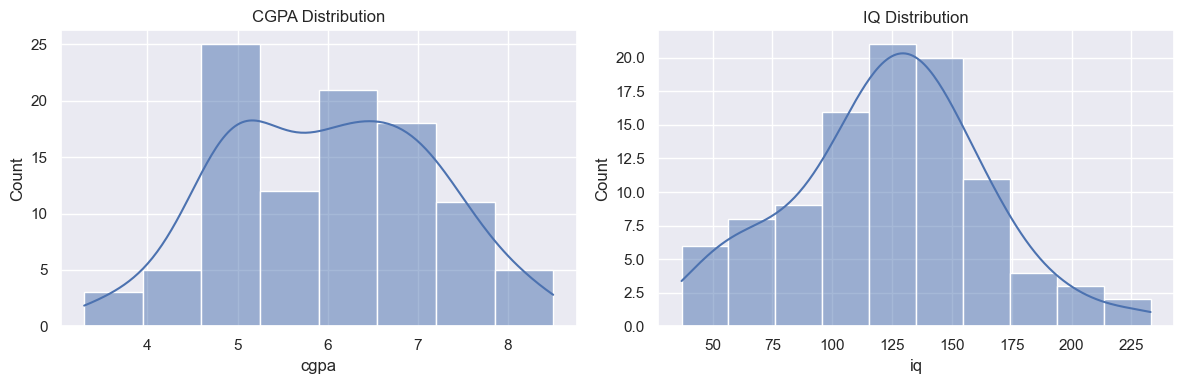

Skewness — cgpa: -0.0006954038546357086
Skewness — iq: 0.018095580898964243


In [4]:
# Histograms with KDE using modern seaborn API
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data=df, x='cgpa', kde=True, ax=axes[0])
axes[0].set_title('CGPA Distribution')
sns.histplot(data=df, x='iq', kde=True, ax=axes[1])
axes[1].set_title('IQ Distribution')
plt.tight_layout()
plt.show()

# Skewness
print('Skewness — cgpa:', df['cgpa'].dropna().skew())
print('Skewness — iq:', df['iq'].dropna().skew())

## Summary stats for CGPA

In [5]:
print('Mean value of cgpa', df['cgpa'].mean())
print('Std value of cgpa', df['cgpa'].std())
print('Min value of cgpa', df['cgpa'].min())
print('Max value of cgpa', df['cgpa'].max())

Mean value of cgpa 5.9910000000000005
Std value of cgpa 1.1436336737775692
Min value of cgpa 3.3
Max value of cgpa 8.5


## 3σ Rule: Outlier detection for CGPA

In [6]:
mu = df['cgpa'].mean()
sigma = df['cgpa'].std()
upper = mu + 3 * sigma
lower = mu - 3 * sigma
print('Highest allowed (μ + 3σ):', round(upper, 2))
print('Lowest  allowed (μ - 3σ):', round(lower, 2))

outliers = df[(df['cgpa'] > upper) | (df['cgpa'] < lower)]
print('\nNumber of CGPA outliers:', len(outliers))
display(outliers.head())

Highest allowed (μ + 3σ): 9.42
Lowest  allowed (μ - 3σ): 2.56

Number of CGPA outliers: 0


,cgpa,iq,placement


## Trimming outliers (CGPA)

In [7]:
new_df = df[(df['cgpa'] <= upper) & (df['cgpa'] >= lower)].copy()
print('Original shape:', df.shape, '| Trimmed shape:', new_df.shape)
display(new_df.describe())

Original shape: (100, 3) | Trimmed shape: (100, 3)


,cgpa,iq,placement
count,100.000000,100.000000,100.0
mean,5.991000,123.580000,0.5
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.0
25%,5.075000,101.500000,0.0
50%,6.000000,127.500000,0.5
75%,6.900000,149.000000,1.0
max,8.500000,233.000000,1.0


## Bivariate plots

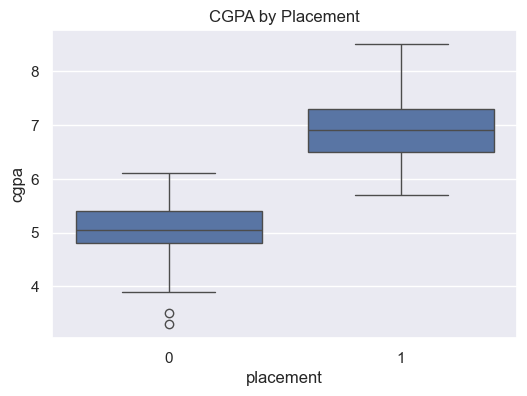

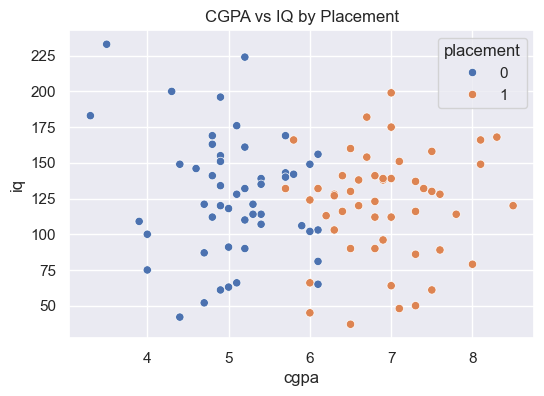

In [8]:
# Boxplot of CGPA by placement outcome
plt.figure(figsize=(6,4))
sns.boxplot(data=new_df, x='placement', y='cgpa')
plt.title('CGPA by Placement')
plt.show()

# Scatter of CGPA vs IQ colored by placement
plt.figure(figsize=(6,4))
sns.scatterplot(data=new_df, x='cgpa', y='iq', hue='placement')
plt.title('CGPA vs IQ by Placement')
plt.show()

## Correlation

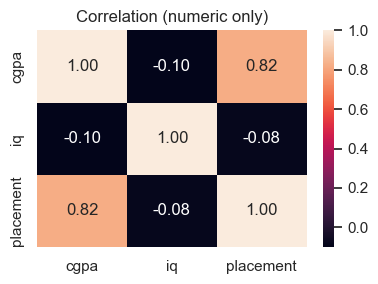

In [9]:
plt.figure(figsize=(4,3))
sns.heatmap(new_df[['cgpa','iq','placement']].corr(numeric_only=True), annot=True, fmt='.2f')
plt.title('Correlation (numeric only)')
plt.tight_layout()
plt.show()

## Save the cleaned dataset (optional)

In [10]:
new_df.to_csv('placement_cleaned.csv', index=False)
print('Saved: placement_cleaned.csv')

Saved: placement_cleaned.csv
